# Hacktoberfest 2 Nigerian Crime Trends Analysis Starter Notebook

### Table of Contents
1. Data Importation
2. Data Cleaning
3. Exploratory Data Analysis
4. Feature Engineering
5. Model Training
6. Model Evaluation

## Data Importation

In [1]:
# Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset

df = pd.read_csv("Nigeria_1997-2024_Sep20.csv")

In [3]:
df.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,NIG38575,2024-09-20,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),Refugees/IDPs (Nigeria),6,...,Bolori,11.8826,13.0890,1,Whatsapp,New media,"On 20 September 2024, IDPs (flood victims) fro...",0,crowd size=no report,1727134598
1,NIG38585,2024-09-20,2024,2,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),Muslim Group (Nigeria),6,...,Ile-Ife,7.4824,4.5603,1,Daily Trust (Nigeria),National,"Around 20 September 2024 (as reported), hundre...",0,crowd size=hundreds,1727134598
2,NIG38581,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),NaN,6,...,Agodi,7.4035,3.9132,1,Daily Post (Nigeria); Guardian (Nigeria); Saha...,National-Regional,"On 19 September 2024, for a second consecutive...",0,crowd size=hundreds,1727134598
3,NIG38588,2024-09-19,2024,1,Strategic developments,Strategic developments,Disrupted weapons use,Police Forces of Nigeria (2023-),NaN,1,...,Buruku,10.6179,7.2331,1,Daily Post (Nigeria); Nigeria Punch,National,"Weapons seizure: On 19 September 2024, Police ...",0,NaN,1727134598
4,NIG38591,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),PDP: People's Democratic Party,6,...,Wanno,7.1389,6.5724,1,Vanguard (Nigeria),National,"On 19 September 2024, PDP youths protested at ...",0,crowd size=no report,1727134598


In [4]:
df.shape

(38076, 31)

## Data Cleaning

In [5]:
df.isnull().sum()

event_id_cnty             0
event_date                0
year                      0
time_precision            0
disorder_type             0
event_type                0
sub_event_type            0
actor1                    0
assoc_actor_1         27877
inter1                    0
actor2                 8551
assoc_actor_2         29273
inter2                    0
interaction               0
civilian_targeting    23112
iso                       0
region                    0
country                   0
admin1                    1
admin2                    1
admin3                38076
location                  0
latitude                  0
longitude                 0
geo_precision             0
source                    0
source_scale              0
notes                     0
fatalities                0
tags                  30562
timestamp                 0
dtype: int64

In [6]:
# Fetch all columns with missing values

missing_cols = []

for col in df.columns:
    if df[col].isnull().sum() > 0:
        missing_cols.append(col)

In [7]:
df[missing_cols].isnull().sum()

assoc_actor_1         27877
actor2                 8551
assoc_actor_2         29273
civilian_targeting    23112
admin1                    1
admin2                    1
admin3                38076
tags                  30562
dtype: int64

In [8]:
# Drop all columns with missing values except admin1 and admin2

missing_cols.remove('admin1')
missing_cols.remove('admin2')

df.drop(missing_cols, inplace=True, axis=1)

In [9]:
df.shape

(38076, 25)

In [10]:
df.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,inter1,inter2,...,admin2,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
0,NIG38575,2024-09-20,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,0,...,Maiduguri Metro,Bolori,11.8826,13.0890,1,Whatsapp,New media,"On 20 September 2024, IDPs (flood victims) fro...",0,1727134598
1,NIG38585,2024-09-20,2024,2,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,0,...,Ife Central,Ile-Ife,7.4824,4.5603,1,Daily Trust (Nigeria),National,"Around 20 September 2024 (as reported), hundre...",0,1727134598
2,NIG38581,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,0,...,Ibadan North,Agodi,7.4035,3.9132,1,Daily Post (Nigeria); Guardian (Nigeria); Saha...,National-Regional,"On 19 September 2024, for a second consecutive...",0,1727134598
3,NIG38588,2024-09-19,2024,1,Strategic developments,Strategic developments,Disrupted weapons use,Police Forces of Nigeria (2023-),1,4,...,Chikun,Buruku,10.6179,7.2331,1,Daily Post (Nigeria); Nigeria Punch,National,"Weapons seizure: On 19 September 2024, Police ...",0,1727134598
4,NIG38591,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,0,...,Etsako East,Wanno,7.1389,6.5724,1,Vanguard (Nigeria),National,"On 19 September 2024, PDP youths protested at ...",0,1727134598


In [11]:
# Drop missing rows in admin1 and admin2

df.dropna(subset=["admin1", "admin2"], inplace=True)

## Exploratory Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

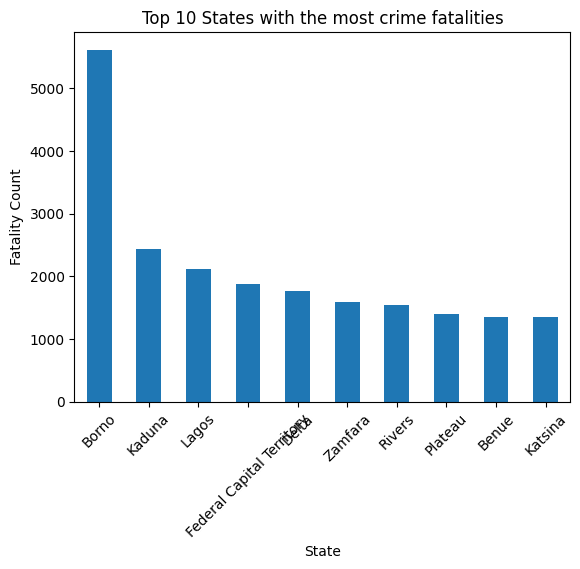

In [12]:
df.groupby('admin1')['fatalities'].agg('count').nlargest(10).plot(kind='bar')
plt.title("Top 10 States with the most crime fatalities")
plt.xlabel("State")
plt.ylabel("Fatality Count")
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

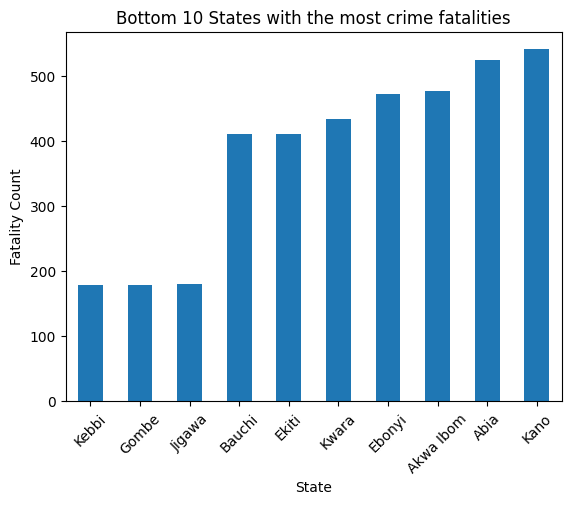

In [13]:
df.groupby('admin1')['fatalities'].agg('count').nsmallest(10).plot(kind='bar')
plt.title("Bottom 10 States with the most crime fatalities")
plt.xlabel("State")
plt.ylabel("Fatality Count")
plt.xticks(rotation=45)
plt.show

In [14]:
# Convert event data to date time object and extract month and day

df['event_date'] = pd.to_datetime(df['event_date'])

df['month'] = df['event_date'].dt.month
df['day'] = df['event_date'].dt.day

<function matplotlib.pyplot.show(close=None, block=None)>

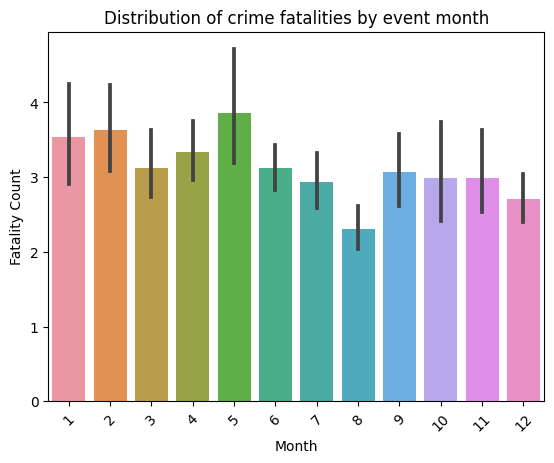

In [15]:
sns.barplot(x='month', y='fatalities', data=df)
plt.title("Distribution of crime fatalities by event month")
plt.xlabel("Month")
plt.ylabel("Fatality Count")
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

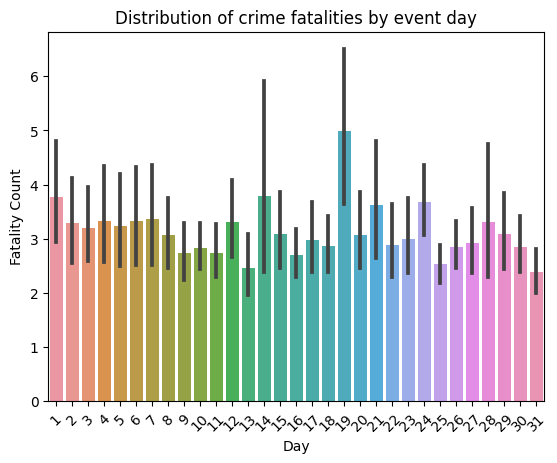

In [16]:
sns.barplot(x='day', y='fatalities', data=df)
plt.title("Distribution of crime fatalities by event day")
plt.xlabel("Day")
plt.ylabel("Fatality Count")
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

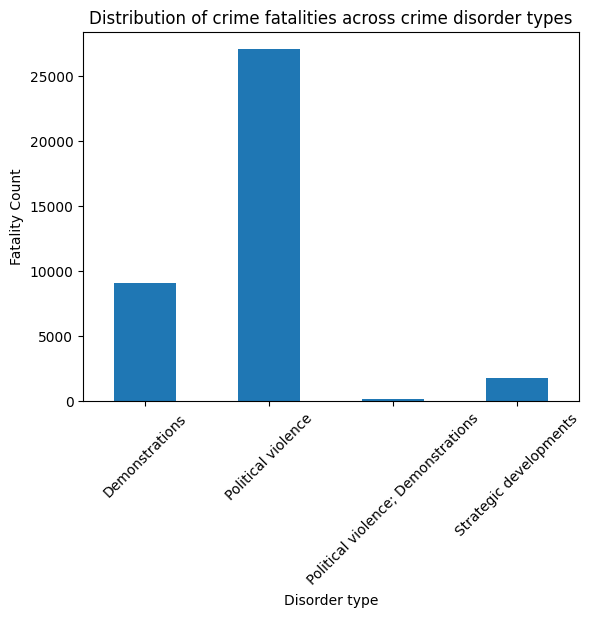

In [17]:
df.groupby('disorder_type')['fatalities'].agg('count').plot(kind='bar')
plt.title("Distribution of crime fatalities across crime disorder types")
plt.xlabel("Disorder type")
plt.ylabel("Fatality Count")
plt.xticks(rotation=45)
plt.show


## Feature Engineering

In [18]:
df.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,inter1,inter2,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,month,day
0,NIG38575,2024-09-20,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,0,...,11.8826,13.0890,1,Whatsapp,New media,"On 20 September 2024, IDPs (flood victims) fro...",0,1727134598,9,20
1,NIG38585,2024-09-20,2024,2,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,0,...,7.4824,4.5603,1,Daily Trust (Nigeria),National,"Around 20 September 2024 (as reported), hundre...",0,1727134598,9,20
2,NIG38581,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,0,...,7.4035,3.9132,1,Daily Post (Nigeria); Guardian (Nigeria); Saha...,National-Regional,"On 19 September 2024, for a second consecutive...",0,1727134598,9,19
3,NIG38588,2024-09-19,2024,1,Strategic developments,Strategic developments,Disrupted weapons use,Police Forces of Nigeria (2023-),1,4,...,10.6179,7.2331,1,Daily Post (Nigeria); Nigeria Punch,National,"Weapons seizure: On 19 September 2024, Police ...",0,1727134598,9,19
4,NIG38591,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,0,...,7.1389,6.5724,1,Vanguard (Nigeria),National,"On 19 September 2024, PDP youths protested at ...",0,1727134598,9,19


In [19]:
df.drop(['event_id_cnty', 'event_date', 'time_precision', 'month', 'day', 'notes', 'timestamp', 'geo_precision', 'iso', 'region', 'country', 'source', 'actor1'], axis=1, inplace=True)

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
# Encode categorical columns

obj_cols = df.select_dtypes(exclude=np.number).columns

for col in obj_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Split the dataset into test and train sets

X = df.drop(['fatalities'], axis=1)
y = df['fatalities']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Model Training

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, pred))

14.232902755509112

<b>Feel free to experiment with other regression models</b>